In [164]:

#Import modules
import pandas as pd
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,  RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, validation_curve


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),color1 = "g",color2 = "r",
                        plotmedian=True, includebasetext=False, baselinepos=[180,0.9]):
    """
    Generate a simple plot of the test and training learning curve.
    The function is straight up copied from dchornillos repository found here:
    http://github.com/dchornillos/explore_financialdata
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    
    This is purely to compare preliminary results between his analysis and mine.
    
    """
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    plt.title(title, color="dimgray", loc="left", size=20)
    plt.xlabel("Training sample size", color="dimgrey",size=15)
    plt.ylabel("Accuracy score", color="dimgrey",size=15)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    print ("number of element in train sample = ", train_sizes)

    
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_median = np.median(train_scores, axis=1)

    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    if plotmedian:
        test_scores_median = np.median(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #plt.grid()
    plt.plot(train_sizes[:], np.zeros(len(train_sizes))+0.889, ls="--", color = "dimgrey", lw=2)
    if includebasetext:
        plt.text(baselinepos[0], baselinepos[1], "baseline prediction",color="dimgrey",size=15)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color=color2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.3, color=color1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color=color2, lw=2,
             label="Training")
    if plotmedian:
        plt.plot(train_sizes, train_scores_median, 'x:', color=color2,alpha=0.3,
             label="Training")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=color1,
             label="Cross-validation", lw=3)
    if plotmedian:
        plt.plot(train_sizes, test_scores_median, 'x:', color=color1, alpha=0.3,
             label="Cross-validation")
    plt.ylim([0.8,1.05])

    legend=plt.legend(loc="best")
    plt.setp(legend.get_texts(), color='dimgray', size=15)

    ax.spines['bottom'].set_color('dimgray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('dimgray')
    ax.tick_params(axis='x', colors='dimgray')
    ax.tick_params(axis='y', colors='dimgray', size=3)
    ax.get_yaxis().set_ticks([0.8,0.9,1.0])

    ax.tick_params(labelsize=14)

    return plt

In [305]:
!python credit_risk_datagen.py 3000 60
with open('loan_data', 'rb') as file:
    loans = pickle.load(file, encoding="latin1")

sys:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
credit_risk_datagen.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trans_agg = trans_agg[(data.date_loan - data.date).dt.days >= time_window_min]


In [306]:

#scale
X = loans.drop(['target','unempl','crime'], axis=1)
X2 = loans[~loans.isna().sum(axis=1).astype(bool)]
y2 = X2.target
X2 = X2.drop('target', axis=1)
y = loans.target
kfold = StratifiedKFold(n_splits=10)

number of element in train sample =  [183 254 325 396 467 538 610]


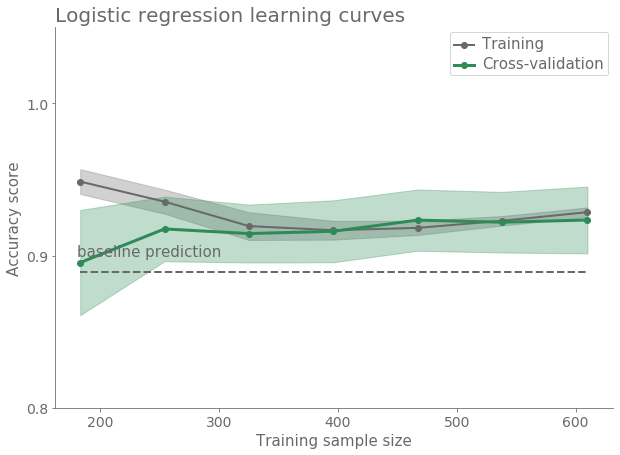

In [307]:
logc = LogisticRegression(penalty='l2', solver='liblinear')
g = plot_learning_curve(logc,"Logistic regression learning curves",X2, y2 ,cv=kfold,
                        train_sizes=np.linspace(.3, 1.0, 7),color2="dimgrey",color1="seagreen",plotmedian=False,
                          includebasetext=True )

number of element in train sample =  [ 60 197 334 471 609]


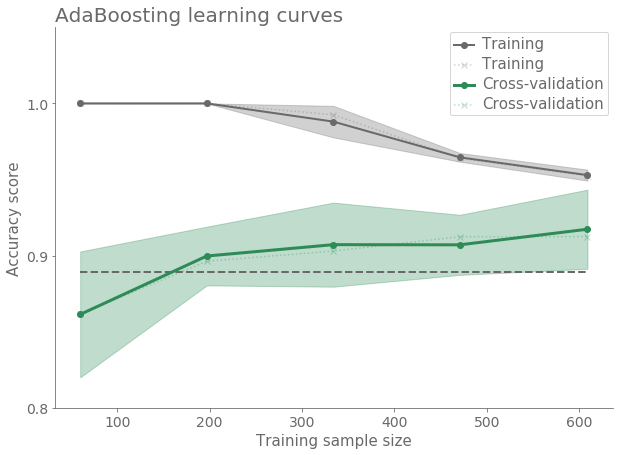

In [297]:
adc = AdaBoostClassifier(**{'n_estimators': 300, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'})
g = plot_learning_curve(adc,"AdaBoosting learning curves",X2,y2,
                           cv=kfold,color2="dimgrey",color1="seagreen")

number of element in train sample =  [182 289 395 502 609]


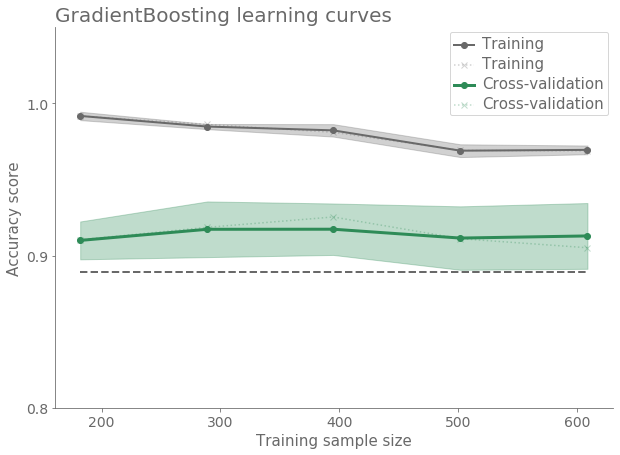

In [298]:
gbc = GradientBoostingClassifier(**{'loss': 'deviance', 'learning_rate': 0.02, 'min_samples_leaf': 20,
                            'n_estimators': 200, 'max_features': 7, 'max_depth': 5})
g = plot_learning_curve(gbc,"GradientBoosting learning curves",X2,y2,cv=kfold,
                           color2="dimgrey",color1="seagreen",
                        train_sizes=np.linspace(.3, 1.0, 5))